In [1]:
import numpy as np
import pandas as pd

In [2]:
from pandasql import sqldf
import pandasql as ps

# 2.1 Problem Statement: Numpy

In [3]:
#Problem Statement 1
#Write a function so that the columns of the output matrix are powers of the input vector. 
#The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1. 
#HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde. 

import numpy as np
def myvander(array,n,increasing):  
    if array.ndim != 1:
        raise ValueError("x must be a one-dimensional array or sequence.")
    else:
        vander = np.zeros(len(array)*n).reshape(len(array),n)   
        k = 0
        if increasing == "False":
            for i in range(n-1,-1,-1):   
                for j in range(len(array)):
                    vander[j][k]= array[j]**(i)
                k+=1
        else:
            for i in range(n):   
                for j in range(len(array)):
                    vander[j][k]= array[j]**(i)
                k+=1
    vander = vander.astype(int)
    return(vander)

array = np.array([8,9,4,3,2])
nvl = lambda a,b: int(a) if len(a)>0 else b
n = nvl(input("Enter order of Power:"),0)
inc = input("Is Increasing(Y/N):")
if inc == 'Y':
    increasing = "True"
else:
    increasing = "False"
print(myvander(array,n,increasing))

#Validation
#print(np.vander(array,n,increasing = False))
 

Enter order of Power:4
Is Increasing(Y/N):N
[[512  64   8   1]
 [729  81   9   1]
 [ 64  16   4   1]
 [ 27   9   3   1]
 [  8   4   2   1]]


In [4]:
# Problem Statement 2:

#Write a function to find moving average in an array over a window: 
#Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

def movingavg(array,k):
    weights = np.repeat(1.0,k)/k
    smas = np.convolve(array,weights,'valid')
    print(len(smas))
    return smas

array = np.array([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150])
k = int(input("Enter window:"))
print(movingavg(array,k))


Enter window:3
11
[  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


# 2.2. Problem Statement: Pandas

In [ ]:
#Problem Statement 1: 
 
#1) How-to-count-distance-to-the-previous-zero  
#For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position 
#Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}  
#The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

In [47]:

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

df_series = df['X']

df['Y'] = ((df_series.groupby(df_series.eq(0).cumsum().mask(df_series.eq(0))).cumcount() + 1).mask(df_series.eq(0), 0).tolist())

print(df)


   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [ ]:
#2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [145]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s



2015-01-01    0.824942
2015-01-02    0.040405
2015-01-05    0.341313
2015-01-06    0.984267
2015-01-07    0.429759
2015-01-08    0.205115
2015-01-09    0.779512
2015-01-12    0.830796
2015-01-13    0.523332
2015-01-14    0.879019
2015-01-15    0.267282
2015-01-16    0.738794
2015-01-19    0.635908
2015-01-20    0.118720
2015-01-21    0.549457
2015-01-22    0.270042
2015-01-23    0.419925
2015-01-26    0.217516
2015-01-27    0.264882
2015-01-28    0.002388
2015-01-29    0.558984
2015-01-30    0.439567
2015-02-02    0.501061
2015-02-03    0.881387
2015-02-04    0.812066
2015-02-05    0.514816
2015-02-06    0.721279
2015-02-09    0.158458
2015-02-10    0.907295
2015-02-11    0.184029
                ...   
2015-11-20    0.351765
2015-11-23    0.835041
2015-11-24    0.236198
2015-11-25    0.378441
2015-11-26    0.469702
2015-11-27    0.512079
2015-11-30    0.397830
2015-12-01    0.239691
2015-12-02    0.674099
2015-12-03    0.392194
2015-12-04    0.177845
2015-12-07    0.093389
2015-12-08 

In [49]:
#3) Find the sum of the values in s for every Wednesday 
s[dti.weekday == 2].sum() 

26.77380892671045

In [50]:
#4) Average For each calendar month

s.resample('M').mean()

2015-01-31    0.527180
2015-02-28    0.527269
2015-03-31    0.429153
2015-04-30    0.503706
2015-05-31    0.509162
2015-06-30    0.500384
2015-07-31    0.528448
2015-08-31    0.485143
2015-09-30    0.370898
2015-10-31    0.657493
2015-11-30    0.494362
2015-12-31    0.459239
Freq: M, dtype: float64

In [189]:
#5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred. 

t1 = s.groupby(pd.Grouper(freq='4M')).idxmax()
t2 = s.groupby(pd.Grouper(freq='4M')).max()
for i in range(4):
    print(t1[i].date(), t2[i] )


2015-01-06 0.9842671223021409
2015-02-12 0.9904366769041042
2015-06-25 0.9393005633670413
2015-12-25 0.9519348272802923


In [57]:
#Problem Statement 2: 
 
#Read the dataset from the below link 
#https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv 

baby_names =  pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv") 
baby_names.head(2)



,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48


In [4]:
#Questions:
#1) Delete unnamed columns 
baby_names = baby_names.drop(columns = "Unnamed: 0")
baby_names.head(2)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48


In [172]:
#2) Show the distribution of male and female 
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [187]:
#3) Show the top 5 most preferred names 
baby_names = baby_names.sort_values("Count",ascending= False)
baby_names.head(5)

,Id,Name,Year,Gender,State,Count
107416,678594,Daniel,2004,M,CA,4167
110097,681275,Daniel,2005,M,CA,3914
115739,686917,Daniel,2007,M,CA,3865
112872,684050,Daniel,2006,M,CA,3826
107417,678595,Anthony,2004,M,CA,3805


In [5]:
#4) What is the median name occurrence in the dataset 
baby_names.loc[baby_names['Count'].median()]

Id            11361
Name      Elizabeth
Year           2004
Gender            F
State            AK
Count            27
Name: 11, dtype: object

In [6]:
#5) Distribution of male and female born count by states 

baby_names.groupby(['State','Gender']).size().reset_index(name='Counts')

,State,Gender,Counts
0,AK,F,2404
1,AK,M,2587
2,AL,F,9878
3,AL,M,8419
4,AR,F,7171
5,AR,M,6475
6,AZ,F,14518
7,AZ,M,10820
8,CA,F,45144
9,CA,M,31637


# 2.3. Problem Statement: Use Cases on Numpy and Pandas

In [5]:
#1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. 
#Use exception handling using try-catch

import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [6]:
# 2) Array out of Bound Exception 
#Write a Python program to give exception “Array Out of Bound” 
#if the user wants to access the elements beyond the list size (use try and except) 

a = [1, 2, 3]
i = int(input("Enter index:"))
try:  
    print("Element:",a[i])   
  
except IndexError: 
    print("Array Out of Bound")

Enter index:4
Array Out of Bound


In [6]:
#3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py. 
#Note : The module created as fibo.py has to be placed in lib folder 

import fibo

print(fibo.fib2(1000))


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


In [5]:
#4) Write a python module script that contains ispalindrome() method to calculate the input string as
#palindrome string or not and save it as palindrome.py. 

from palindrome import *
s = input("Enter String:")
result = isPalindrome(s) 
  
if result == 1: 
    print("Is Palindrome") 
else: 
    print("Not Palindrome") 

    


Enter String:malayalam
Is Palindrome


In [128]:
#5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string 
#and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. 
#Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the
#user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha 
#and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters.
#Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. 
#Create an instance of this class, encrypt and decrypt back the user entered string.

import random
class cipher:
    def __init__(self):
        self.string = input("Enter String:")
        self.key = random.randint(1,51)
    def encrypt(self): 
        self.ciphertext = ''
        for i in (chr(((ord(char) - 65 + self.key) % 26) + 65)
                             if char.isupper() & char.isalpha() else chr(((ord(char) - 97 + self.key) % 26) + 97) 
                             if char.islower() & char.isalpha() else chr((ord(char) + self.key - 48) % 10 + 48) 
                            if char.isdigit() else char for char in self.string):
            self.ciphertext += i
        print("Key:", self.key)
        print("Encrypted String: ",self.ciphertext)
        
    def decrypt(self): 
        decrypted_string = ''
        for i in (chr(((ord(char) - 65 - self.key) % 26) + 65)
                             if char.isupper() & char.isalpha() else chr(((ord(char) - 97 - self.key) % 26) + 97) 
                             if char.islower() & char.isalpha() else chr((ord(char) - self.key - 48) % 10 + 48) 
                            if char.isdigit() else char for char in self.ciphertext):
            decrypted_string += i
        print('Decrypted String:',decrypted_string)
        

obj = cipher()
obj.encrypt()
obj.decrypt()

Enter String:Test th!s $tr!ng 123
Key: 28
Encrypted String:  Vguv vj!u $vt!pi 901
Decrypted String: Test th!s $tr!ng 123


6) Get Data from the following link: 
 
http://files.grouplens.org/datasets/movielens/ml-20m.zip 
 
We will be using the following files for this exercise: 
 
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp 
movies.csv : movieId, title, genres 
 

In [7]:
# I. Read the dataset using pandas. 
ratings = pd.read_csv("C:/Python_Learning/Submissions/Assignment2/ratings.csv")
tags = pd.read_csv("C:/Python_Learning/Submissions/Assignment2/tags.csv")
movies = pd.read_csv("C:/Python_Learning/Submissions/Assignment2/movies.csv")

print(ratings.head(2))
print(tags.head(2))
print(movies.head(2))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
   userId  movieId          tag   timestamp
0      18     4141  Mark Waters  1240597180
1      65      208    dark hero  1368150078
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


In [8]:
#II. Extract the first row from tags and print its type. 

print(5*'*',"Extraction as DF",5*'*')
df = tags.head(1)
print(df)
print("Type:", type(df),'\n') # Extraction as DataFrame

print(5*'*',"Extraction as Series",5*'*')
s = tags.loc[0]
print(s,type(s)) #Extraction as Series

***** Extraction as DF *****
   userId  movieId          tag   timestamp
0      18     4141  Mark Waters  1240597180
Type: <class 'pandas.core.frame.DataFrame'> 

***** Extraction as Series *****
userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object <class 'pandas.core.series.Series'>


In [9]:
#III. Extract row 0, 11, 2000 from tags DataFrame. 

print(tags.loc[[11,30,2000]])


      userId  movieId                tag   timestamp
11        65     1783      noir thriller  1368149983
30        65    51884          bollywood  1368149876
2000     910    68554  conspiracy theory  1368043943


In [10]:
#IV.  Print index, columns of the DataFrame. 
data = tags.head(10)
for row in data.index:
    print(row,end = " ")
tags.dtypes

0 1 2 3 4 5 6 7 8 9 

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [11]:
#V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().
print("Count:",ratings['rating'].count())
print("Mean:",ratings['rating'].mean())
print("Standard Deviation:", ratings['rating'].std())
print("Min:", ratings['rating'].min())
print(ratings['rating'].quantile([0.25]))
print("Median",ratings['rating'].median())
print(ratings['rating'].quantile([0.75]))
print("Min:", ratings['rating'].max())

Count: 20000263
Mean: 3.5255285642993797
Standard Deviation: 1.051988919275684
Min: 0.5
0.25    3.0
Name: rating, dtype: float64
Median 3.5
0.75    4.0
Name: rating, dtype: float64
Min: 5.0


In [81]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [40]:
#VI. Filter out ratings with rating > 5

Filter = ratings["rating"] > 5
ratings.where(Filter).dropna()

,userId,movieId,rating,timestamp


In [12]:
#VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified. 
print("Ratings:" ,ratings.isnull().values.any())
print("Movies:", movies.isnull().values.any())
print("Tags:" ,tags.isnull().values.any())
print("No.of missing values in Tags:", tags.isnull().sum().sum())
print(tags.isnull().sum())
tags['tag'].fillna('sci-fi',inplace = True)

Ratings: False
Movies: False
Tags: True
No.of missing values in Tags: 16
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [13]:
#VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

movies[movies['genres'].str.contains('Animation')].head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


In [14]:
#IX. Find the average rating of movies.
ratings['rating'].mean()

3.5255285642993797

In [15]:
#X. Perform an inner join of movies and tags based on movieId.
movies_tags = pd.merge(movies,tags,how='inner',on='movieId')
movies_tags.head(5)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


In [102]:
#XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4. 
movies_ratings = pd.merge(movies,ratings, how='inner',left_on='movieId',right_on = 'movieId')
movies_ratings = movies_ratings.where(movies_ratings.rating > 4)
movies_ratings.fillna('unknown',inplace = True)
movies_ratings[movies_ratings['genres'].str.contains('Comedy')].head(5)

,movieId,title,genres,Type1,Type2,Type3,Type4,Type5,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,6,5,8.58275e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,11,4.5,1.23086e+09
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,14,4.5,1.22531e+09
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,19,5,8.55177e+08
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,34,5,8.46509e+08


In [100]:
#XII. Split 'genres' into multiple columns. 
new = movies['genres'].str.split("|",n=5,expand = True)
new.dtypes
movies["Type1"] = new[0]
movies["Type2"] = new[1]
movies["Type3"] = new[2]
movies["Type4"] = new[3]
movies["Type5"] = new[4]
movies.head(5)


,movieId,title,genres,Type1,Type2,Type3,Type4,Type5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None


In [78]:
#XIII. Extract year from title e.g. (1995). 
movies['title'].str.extract("\((.*)\)").head(5)

,0
0,1995
1,1995
2,1995
3,1995
4,1995


In [16]:
#XIV. Select rows based on timestamps later than 2015-02-01. 
import datetime
date_time_str = '2015-02-01'  
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')

Filter = pd.to_datetime(ratings['timestamp']).apply(lambda x: x.date()) > date_time_obj.date()
ratings.where(Filter).dropna().head(5)


,userId,movieId,rating,timestamp


In [18]:
#XV. Sort the tags DataFrame based on timestamp. 

ratings.sort_values("timestamp",ascending= False,inplace=True)
ratings.head(5)


,userId,movieId,rating,timestamp
12675921,87586,7151,3.5,1427784002
12898527,89081,52458,4.0,1427782288
12898546,89081,55232,3.5,1427782286
2508834,16978,2093,3.5,1427781797
7819902,53930,118706,3.5,1427781651


# 2.4. Problem Statement: Matplotlib 

Matplotlib: 
 
This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 

In [70]:
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url) 
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


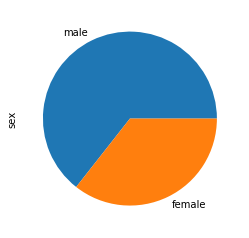

In [73]:
#1. Create a pie chart presenting the male/female proportion 
from matplotlib import pyplot as plt
titanic['sex'].value_counts().plot.pie()

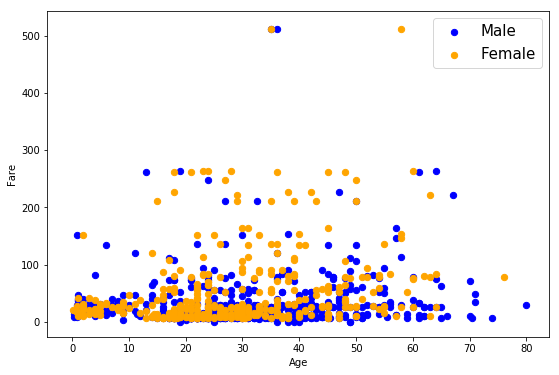

In [41]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.scatter(titanic[titanic['sex']=='male']['age'],titanic[titanic['sex']=='male']['fare'],c='blue',s=40)
ax.scatter(titanic[titanic['sex']=='female']['age'],titanic[titanic['sex']=='female']['fare'],c='orange',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Male','Female'),scatterpoints=1,loc='upper right',fontsize=15,)

# 2.5. Problem Statement: Data Cleaning 

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 
 
Take this monstrosity as the DataFrame to use in the following puzzles: 

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
 
'Budapest_PaRis', 'Brussels_londOn'], 
 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 

 
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
 
'12. Air France', '"Swiss Air"']}) 

In [236]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'], 
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [237]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row
#so 10055 and 10075 need to be put in place. #Fill in these missing numbers and make the column an integer column (instead of a float column).

df['FlightNumber'] = df['FlightNumber'].fillna(df['FlightNumber'].shift(1) + 10)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [238]:
#2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give
# a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

df_temp = df.copy()

new = df['From_To'].str.split("_",n=2,expand = True)
df_temp.insert(1,'From',new[0])
df_temp.insert(2,'To',new[1])
df_temp = df_temp.drop(columns = 'From_To')
df_temp



,From,To,FlightNumber,RecentDelays,Airline
0,LoNDon,paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid,miLAN,10055.0,[],<Air France> (12)
2,londON,StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,PaRis,10075.0,[13],12. Air France
4,Brussels,londOn,10085.0,"[67, 32]","""Swiss Air"""


In [239]:
#3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".) 

df_temp['From'] = df_temp['From'].str.capitalize()
df_temp['To'] = df_temp['To'].str.capitalize()
df_temp

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045.0,"[23, 47]",KLM(!)
1,Madrid,Milan,10055.0,[],<Air France> (12)
2,London,Stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075.0,[13],12. Air France
4,Brussels,London,10085.0,"[67, 32]","""Swiss Air"""


In [240]:
# 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions. 

df = df.drop('From_To', 1)
df = pd.concat([df_temp,df],axis = 1)


In [241]:
df

,From,To,FlightNumber,RecentDelays,Airline,FlightNumber,RecentDelays,Airline
0,London,Paris,10045.0,"[23, 47]",KLM(!),10045.0,"[23, 47]",KLM(!)
1,Madrid,Milan,10055.0,[],<Air France> (12),10055.0,[],<Air France> (12)
2,London,Stockholm,10065.0,"[24, 43, 87]",(British Airways. ),10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075.0,[13],12. Air France,10075.0,[13],12. Air France
4,Brussels,London,10085.0,"[67, 32]","""Swiss Air""",10085.0,"[67, 32]","""Swiss Air"""


In [191]:
#5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value
#in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 
#Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. 
#and replace the unwanted RecentDelays column in df with delays. 

df2 = pd.DataFrame(df['RecentDelays'].values.tolist(), columns=['Col1','Col2','Col3'])
df.insert(3,'delay_1',df2['Col1'])
df.insert(4,'delay_2',df2['Col2'])
df.insert(5,'delay_3',df2['Col3'])


In [192]:
df

,From_To,FlightNumber,RecentDelays,delay_1,delay_2,delay_3,Airline,From,To
0,LoNDon_paris,10045.0,"[23, 47]",23.0,47.0,NaN,KLM(!),London,Paris
1,MAdrid_miLAN,10055.0,[],NaN,NaN,NaN,<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065.0,"[24, 43, 87]",24.0,43.0,87.0,(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075.0,[13],13.0,NaN,NaN,12. Air France,Budapest,Paris
4,Brussels_londOn,10085.0,"[67, 32]",67.0,32.0,NaN,"""Swiss Air""",Brussels,London


# 2.6. Problem Statement: Pandas SQL 

Problem statement 1: 
 
Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
Rename the columns as per the description from this file: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names 

In [84]:
adult_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
adult_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
#Renaming the columns
adult_data.rename(columns = {0:"age",1:"workclass",2:"fnlwgt",3:"education",4:"education_num",
                             5:"marital_status",6:"occupation",7:"relationship",8:"race",9:"sex",10:"capital_gain",
                             11:"capital_loss",12:"hours_per_week",13:"native_country"},inplace=True)
adult_data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
#Create a sql db from adult dataset and name it sqladb  # As per mentor not creating DB, using sqldf
#1. Select 10 records from the adult sqladb  
pysqldf = lambda q: sqldf(q, globals())
pysqldf("Select * from adult_data Limit 10;")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [36]:
#2. Show me the average hours per week of all men who are working in private sector 
pysqldf("""Select hours_per_week from adult_data where trim(sex) = trim('Male') and trim(workclass) = trim('Private')
        group by sex,workclass""")

,hours_per_week
0,40


In [43]:
#3. Show me the frequency table for education, occupation and relationship, separately 
pysqldf("Select education, count(education) frequency from adult_data group by education")

,education,frequency
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5355


In [44]:
#Occupation
pysqldf("Select occupation, count(occupation) frequency from adult_data group by occupation")

,occupation,frequency
0,?,1843
1,Adm-clerical,3770
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [45]:
#relationship
pysqldf("Select relationship, count(relationship) frequency from adult_data group by relationship")

,relationship,frequency
0,Husband,13193
1,Not-in-family,8305
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


In [47]:
#4. Are there any people who are married, working in private sector and having a master’s degree 

Y = pysqldf("""Select count('X') count from adult_data where trim(marital_status) like 'Married%' 
           and trim(workclass) = 'Private' and trim(Education) = 'Masters'""")

if Y['count'].values[0] >0:
    print("Yes,",Y['count'].values[0],"people are married, working in private sector and having a master’s degree")

Yes, 540 people are married, working in private sector and having a master’s degree


In [55]:
#5. What is the average, minimum and maximum age group for people working in different sectors 
pysqldf("""select workclass,avg(age) Average_Age, min(age) Minimum_Age, max(age) Maximum_Age 
from adult_data group by workclass""")

,workclass,Average_Age,Minimum_Age,Maximum_Age
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436055,17,81
8,Without-pay,47.785714,19,72


In [66]:
#6. Calculate age distribution by country 

age_dist = pysqldf("""select native_country, avg(age), min(age), max(age)
        from adult_data group by native_country order by native_country""")
age_dist.head(10)

,native_country,avg(age),min(age),max(age)
0,?,38.725557,17,90
1,Cambodia,37.789474,18,65
2,Canada,42.545455,17,80
3,China,42.533333,22,75
4,Columbia,39.711864,18,75
5,Cuba,45.768421,21,82
6,Dominican-Republic,37.728571,18,78
7,Ecuador,36.642857,21,90
8,El-Salvador,34.132075,17,79
9,England,41.155556,17,90


In [77]:
#7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capitalloss' 
Net_profit = pysqldf("select *, capital_gain - capital_loss Net_Capital_Gain from adult_data ")
Net_profit.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,14,Net_Capital_Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


Problem Statement 2:
Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data 

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [6]:
#1. Create an sqlalchemy engine using a sample from the data set 
from sqlalchemy import create_engine

df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')
df.to_sql('mydataset', engine)


In [18]:
#2. Write two basic update queries 
engine.execute('''UPDATE mydataset SET income = '<30K' WHERE fnlwgt=77516''')
engine.execute('''UPDATE mydataset SET workclass = 'State-gov' WHERE fnlwgt=83311''')

print(engine.execute('''SELECT * FROM mydataset
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

print(engine.execute('''SELECT * FROM mydataset
WHERE  fnlwgt=83311''').fetchall())


[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', '<30K')]
[(1, 50, 'State-gov', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K'), (16474, 54, 'State-gov', 83311, ' Prof-school', 15, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 30, ' United-States', ' >50K')]


In [22]:
#3. Write two delete queries 
engine.execute('''DELETE FROM mydataset WHERE fnlwgt= 45781''')
engine.execute('''DELETE FROM mydataset WHERE education = ' 9th' ''')
print(engine.execute('''SELECT * FROM mydataset
WHERE  fnlwgt=45781''').fetchall())
               
print(engine.execute('''SELECT * FROM mydataset
WHERE education = ' 9th' ''').fetchall())

[]
[]


In [34]:
#4. Write two filter queries 

print(engine.execute('''SELECT * FROM mydataset WHERE age > 88 ''').fetchall())
print(engine.execute('''SELECT * FROM mydataset WHERE income = '<30K'  and age > 30 ''').fetchall())


[(222, 90, ' Private', 51744, ' HS-grad', 9, ' Never-married', ' Other-service', ' Not-in-family', ' Black', ' Male', 0, 2206, 40, ' United-States', ' <=50K'), (1040, 90, ' Private', 137018, ' HS-grad', 9, ' Never-married', ' Other-service', ' Not-in-family', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'), (1935, 90, ' Private', 221832, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 45, ' United-States', ' <=50K'), (2303, 90, ' Private', 52386, ' Some-college', 10, ' Never-married', ' Other-service', ' Not-in-family', ' Asian-Pac-Islander', ' Male', 0, 0, 35, ' United-States', ' <=50K'), (2891, 90, ' Private', 171956, ' Some-college', 10, ' Separated', ' Adm-clerical', ' Own-child', ' White', ' Female', 0, 0, 40, ' Puerto-Rico', ' <=50K'), (4070, 90, ' Private', 313986, ' 11th', 7, ' Never-married', ' Handlers-cleaners', ' Own-child', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (4109, 90, ' ?', 256514, ' Bache

In [38]:
#5. Write two function queries

print(engine.execute('''SELECT avg(age),sex FROM mydataset group by sex ''').fetchall())

print(engine.execute('''SELECT count(*) , sex FROM mydataset group by sex ''').fetchall())



[(36.78795294117647, ' Female'), (39.41265172735761, ' Male')]
[(10625, ' Female'), (21420, ' Male')]
